In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\datasets\\loan_prediction.csv")

## EDA

In [46]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Loan_ID :- It's kind of a unique no. generate for every loan application. It's not have any thing to do with loan approval or rejection. It's just help to identify file.

Gender :- ordinal data

Married : - ordinal data (Yes/no)

Dependents :- Family members who is not working and depend on the applicant.

Self-Employed :- Whether having Business or salaried(Yes/no)

ApplicantIncome :- contineous Variable

CoapplicantIncome :- It can be Zero in case Coapplicant didn't have any source of income(i.e HouseWife, person who didn't work)

LoanAmount :- Amount which he/she want.

Propety Area :- where the client residing(urban/rural/semiurban)

In [47]:
print(" The dataset has",df.shape[0],"Rows and",df.shape[1] ,"Columns")

 The dataset has 614 Rows and 13 Columns


In [48]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


By looking at general Statistics we can say that the dataset has Skewness. May be because of Outliers

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [50]:
df.nunique().sort_values()

Gender                 2
Married                2
Education              2
Self_Employed          2
Credit_History         2
Loan_Status            2
Property_Area          3
Dependents             4
Loan_Amount_Term      10
LoanAmount           203
CoapplicantIncome    287
ApplicantIncome      505
Loan_ID              614
dtype: int64

In [51]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

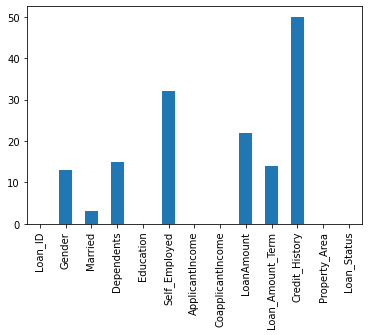

In [52]:
df.isna().sum().plot.bar()

##### There is 7 column has Nan's in this dataset. Need to find out a perfect method to fill that data because some of the columns is categorical.

Credit_History has the highest Nan's

In [53]:
df.isin([0]).sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History        89
Property_Area          0
Loan_Status            0
dtype: int64

<AxesSubplot:>

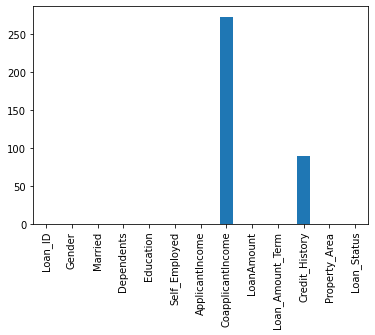

In [54]:
df.isin([0]).sum().plot.bar()

Co-applicantIncome is zero is 273 rows may be because the Co-applicant is wife of the Applicant who is applying for loan or may be some relative.

Credit_History is zero because the applicant never had earlier any credit card or taken any loan. It's first time he/she is applying for loan

In [55]:
df.isin([" "]).sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

No spaces enter in any columns 

In [56]:
df.skew().to_frame(name="Skewness")

,Skewness
ApplicantIncome,6.539513
CoapplicantIncome,7.491531
LoanAmount,2.677552
Loan_Amount_Term,-2.362414
Credit_History,-1.882361


## Univariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

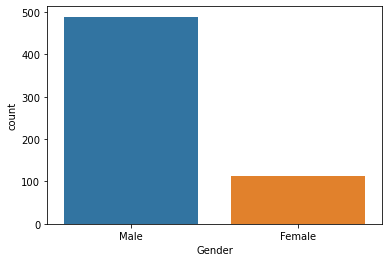

In [57]:
sns.countplot(df["Gender"])

Just by looking at above graph we can say that Male apply for loan more than Female.

<AxesSubplot:xlabel='Married', ylabel='count'>

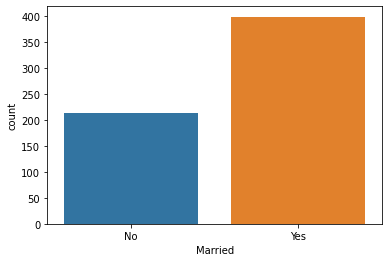

In [58]:
sns.countplot(df["Married"])

Married person apply for loan more than Not Married

<AxesSubplot:xlabel='Education', ylabel='count'>

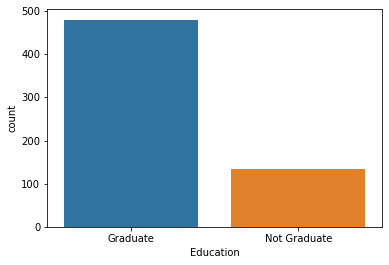

In [59]:
sns.countplot(df["Education"])

Graduate takes loan more than Not Graduate person.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

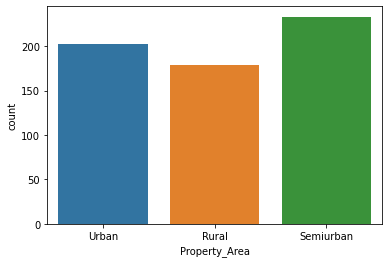

In [60]:
sns.countplot(df["Property_Area"])

No. of loan application in Semiurban is higher than the Urban and Rural property Area

<AxesSubplot:xlabel='Dependents', ylabel='count'>

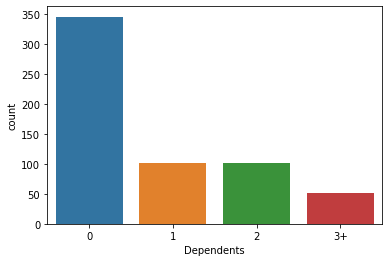

In [61]:
sns.countplot(df["Dependents"])

No. of Loan application is greater than the person who has dependents

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

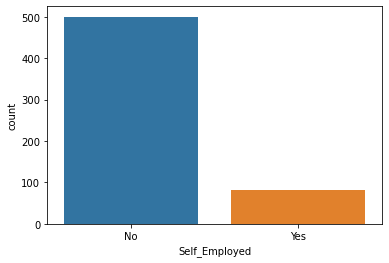

In [62]:
sns.countplot(df["Self_Employed"])

Salaried person apply  loan more than a person who has it's own Business

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

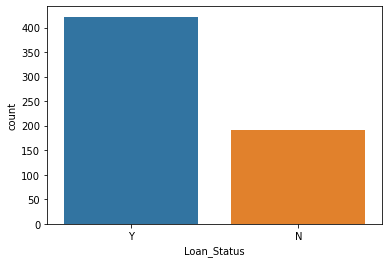

In [63]:
sns.countplot(df["Loan_Status"])

There is class imbalanced in the data. Need to take care of it before feeding data to model

In [64]:
numerical = df.select_dtypes(exclude="object")

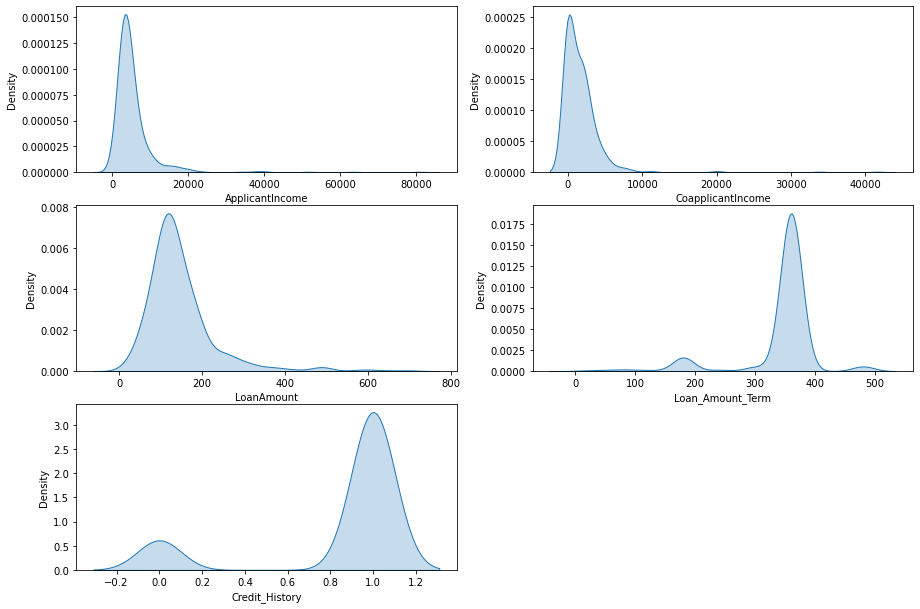

In [65]:
plt.figure(figsize=(15,25))
plotnumber = 1
for i in numerical:
    if plotnumber < 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.kdeplot(df[i],data=df,fill=True)
        plotnumber+=1
plt.show()

Dataset is seemed to be too much skewed

## Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

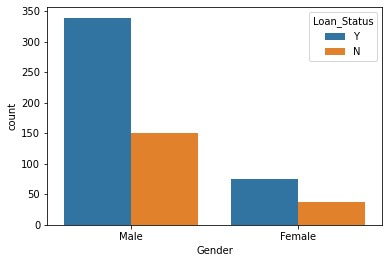

In [66]:
sns.countplot(df["Gender"],data=df,hue="Loan_Status")

As we can see that their is large no. of chances of approval of loan for Male candidate but we can't say that Because in dataset we have large no. of Male applicant data as compare to Female. So we can say that their is fair chances for both of them to get approval of the loan depend on the other parameters

<AxesSubplot:xlabel='Dependents', ylabel='count'>

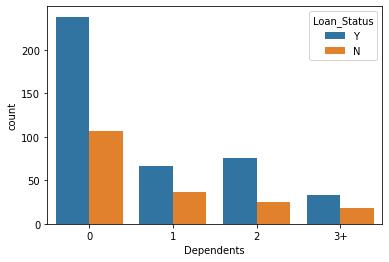

In [67]:
sns.countplot(df["Dependents"],data=df,hue="Loan_Status")

Loan application and chances of getting the loan is higher for the person has either no dependents or having less dependents on him/her

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

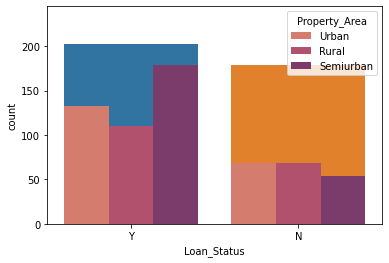

In [68]:
ax = sns.countplot(df["Property_Area"],data=df)
sns.countplot(df["Loan_Status"],data=df,ax=ax,hue='Property_Area',palette='flare')

From above we can say that People from Semi Urban has the good chances of getting the approval.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

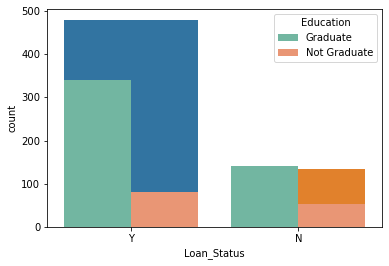

In [69]:
ax = sns.countplot(df["Education"],data=df)
sns.countplot(df["Loan_Status"],data=df,ax=ax,hue='Education',palette='Set2')

The Graduate person chances of approval of loan is higher than the Not Graduate. But we can't say with surity because we have the no. of Graduate in our dataset higher than Not Graduate

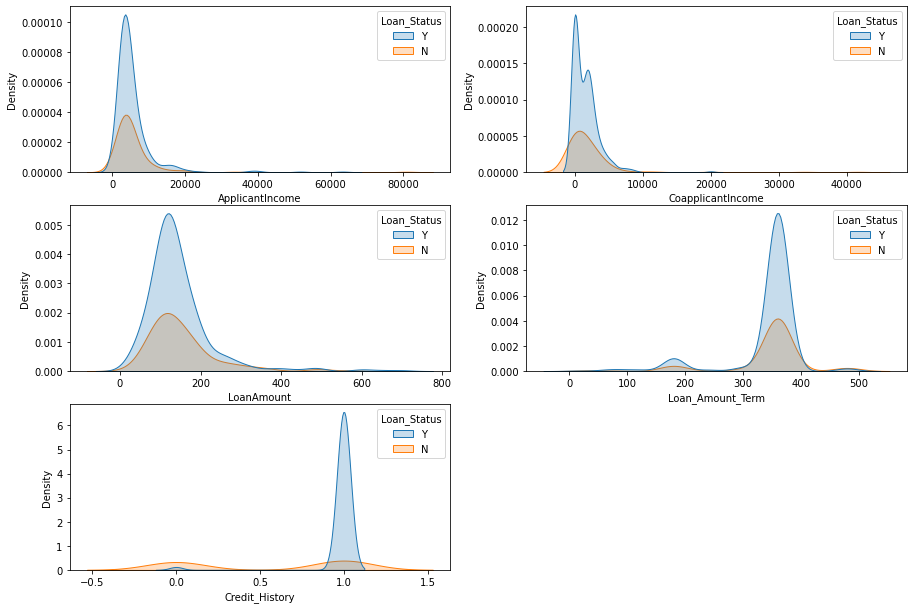

In [70]:
plt.figure(figsize=(15,25))
plotnumber = 1
for i in numerical:
    if plotnumber < 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.kdeplot(df[i],data=df,fill=True,hue='Loan_Status')
        plotnumber+=1
plt.show()

From above graph we can See that there is high chances of getting approval if We have Less LoanAmount.

Chances is High if we have 360 Loan_Amount_term

If a person has the Credit_History then there is 99% chances that he is get the loan Approval. and viceversa of this is for Credit_History

### Before going anyfurther i need to Encode the Features, But before that need to take care of Nan's

In [71]:
categorical = df.select_dtypes(exclude=np.number)

In [72]:
column = categorical.columns

Loan id is not required as we know it's just an id provided to the every applicant

In [73]:
# Replacing > 3+ to 4 so because our system do not understand the strings
df[df["Dependents"]=="3+"]=df[df["Dependents"]=="3+"].replace("3+",4)

In [74]:
df[column].isna().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [83]:
index = np.where(df["Gender"].isna())

In [84]:
df.drop(df.index[index],axis=0,inplace=True)

In [86]:
for i in df[["Married","Dependents","Self_Employed"]]:
    df[i] = df[i].fillna(df[i].mode(0)[0])

Now the dataset has no Nan's

In [88]:
## Using Label Encoding to encode the data
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [89]:
for i in df[["Loan_ID","Gender","Married","Self_Employed","Property_Area","Education"]]:
    df[i]=lab_enc.fit_transform(df[i])

In [90]:
df["Loan_Status"] = np.where(df["Loan_Status"]=='Y',1,0)

In [91]:
# Converting column datatype
df["Dependents"] = df["Dependents"].astype("int64")

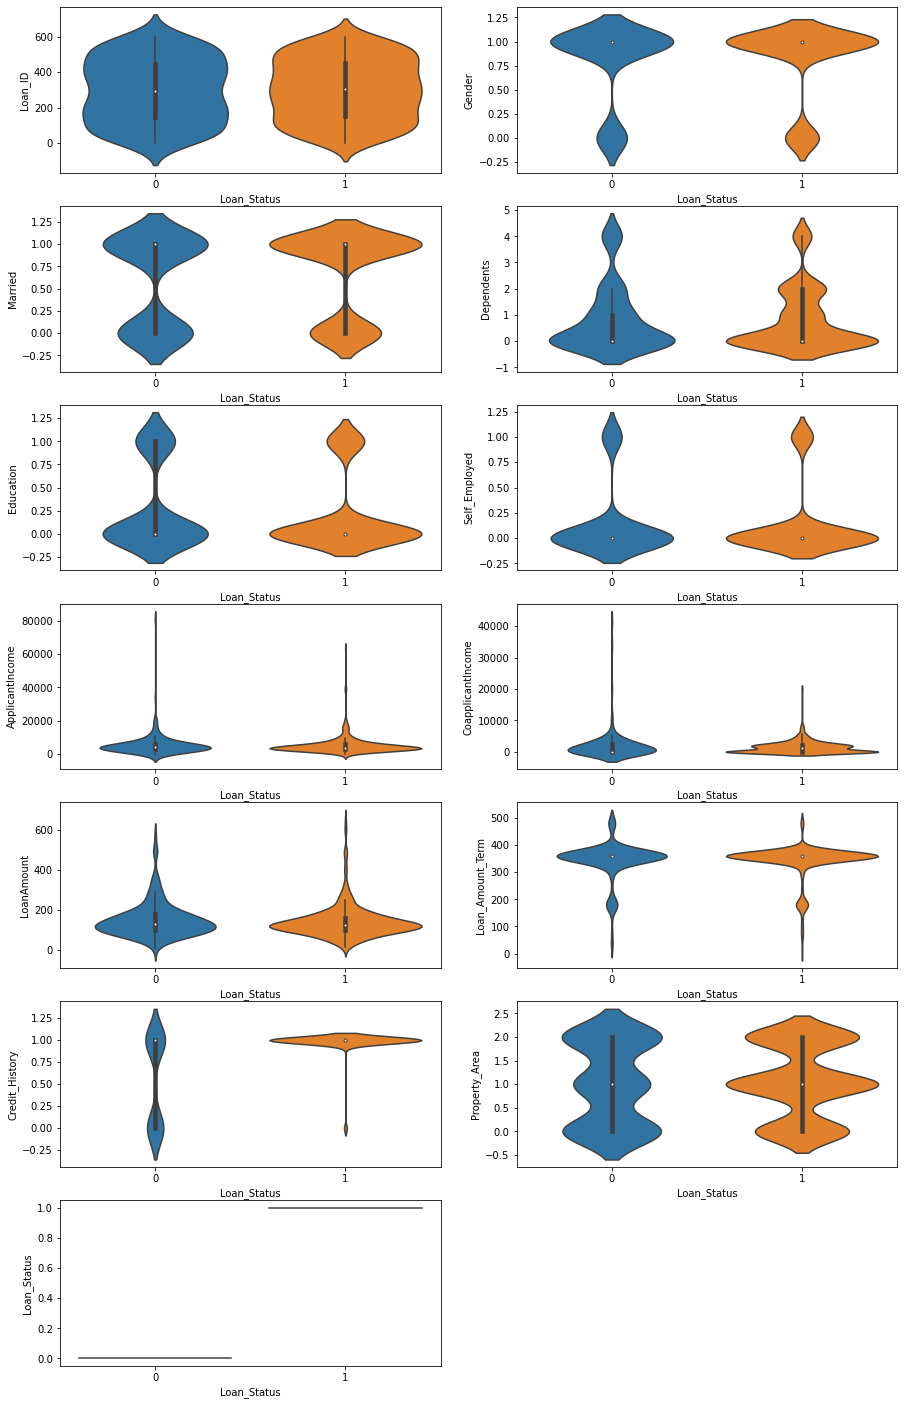

In [92]:
plt.figure(figsize=(15,25))
plotnumber = 1
for i in df:
    if plotnumber < 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.violinplot(df["Loan_Status"],df[i])
        plotnumber+=1
plt.show()

If a person has a Credit_History then their is high chances of Approval.
Remaining column seems has same relation.

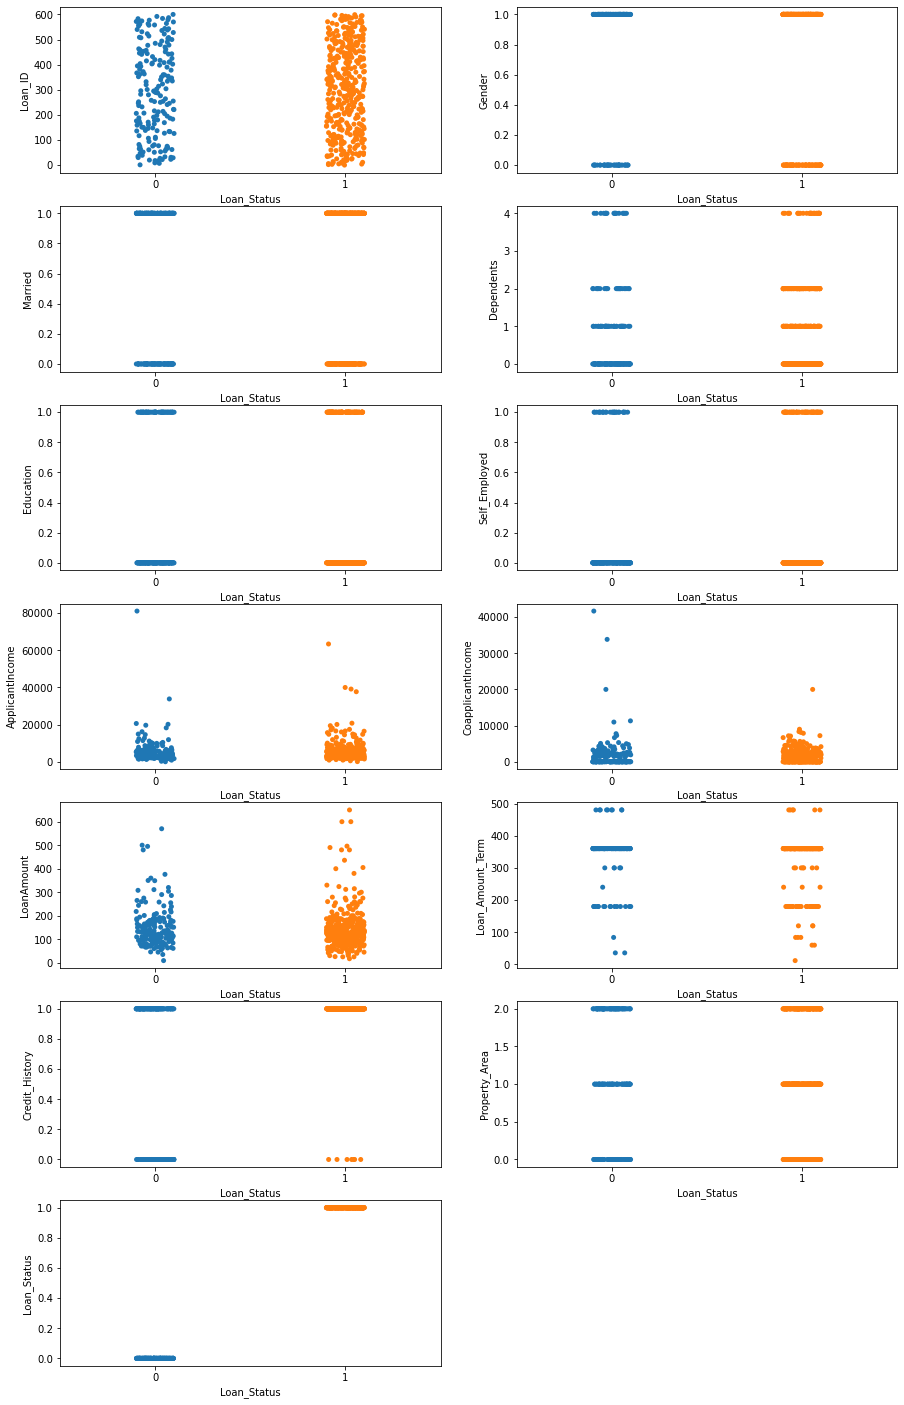

In [93]:
plt.figure(figsize=(15,25))
plotnumber = 1
for i in df:
    if plotnumber < 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.stripplot(df["Loan_Status"],df[i])
        plotnumber+=1
plt.show()

## Multivaraite Analysis

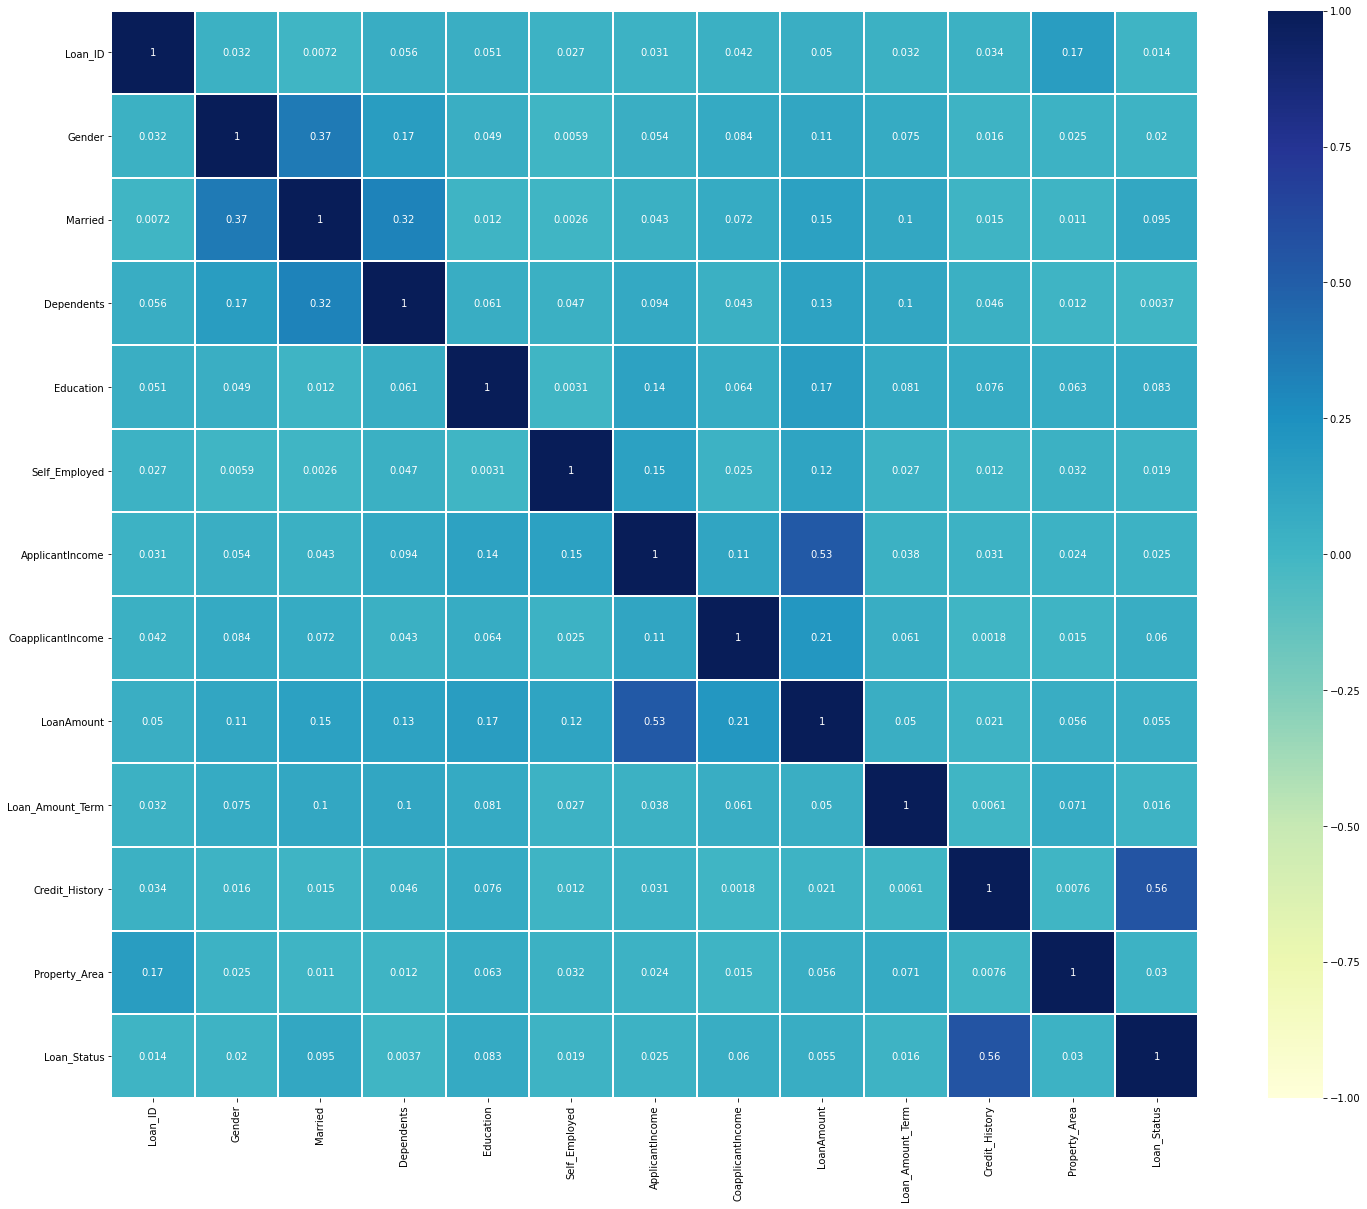

In [94]:
plt.figure(figsize=(25,20))
df_corr = df.corr().abs()
sns.heatmap(df_corr,vmin=-1,vmax=1,center=0,cmap='YlGnBu',fmt='.2g',annot=True,linewidth=1,square=True)
plt.show()

From heatmap we can say that Credit_History is an important features in predicting Loan_Status or we can say that those who have good Credit_History het the approval of the easily.

Loan Amount is also has correlation with the income. Because both are related any finance institute gives loan to a person after knowing about his income and saving on that basis how much loan can be sanctioned is decide

In [95]:
df.corr()["Loan_Status"].abs()

Loan_ID              0.014273
Gender               0.019857
Married              0.095423
Dependents           0.003676
Education            0.083264
Self_Employed        0.018506
ApplicantIncome      0.024674
CoapplicantIncome    0.059666
LoanAmount           0.055210
Loan_Amount_Term     0.016486
Credit_History       0.557919
Property_Area        0.029504
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

Dependents has the least correlation with Target Variable

## DataCleaning

In [96]:
df["Loan_Amount_Term"].value_counts()

360.0    501
180.0     43
480.0     15
300.0     12
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [97]:
# Taking care of Nan's in continues data
num = numerical.columns
df[num].isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
dtype: int64

Credit_History is categorical (Y/N) so i am going to use mode method to fill missing value of that column

Loan Amount is continues we can use median and mean method to fill that column

Loan Term also seems to categorical because it has limited choices.so i am going to replace nan's of this column with most frequent values

In [98]:
# Filling LoanAmount with mean of that column
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())

In [99]:
# Filling Loan_Amount_Term and Credit_History with most frequent Value of that columns
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [100]:
# checking missing values
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

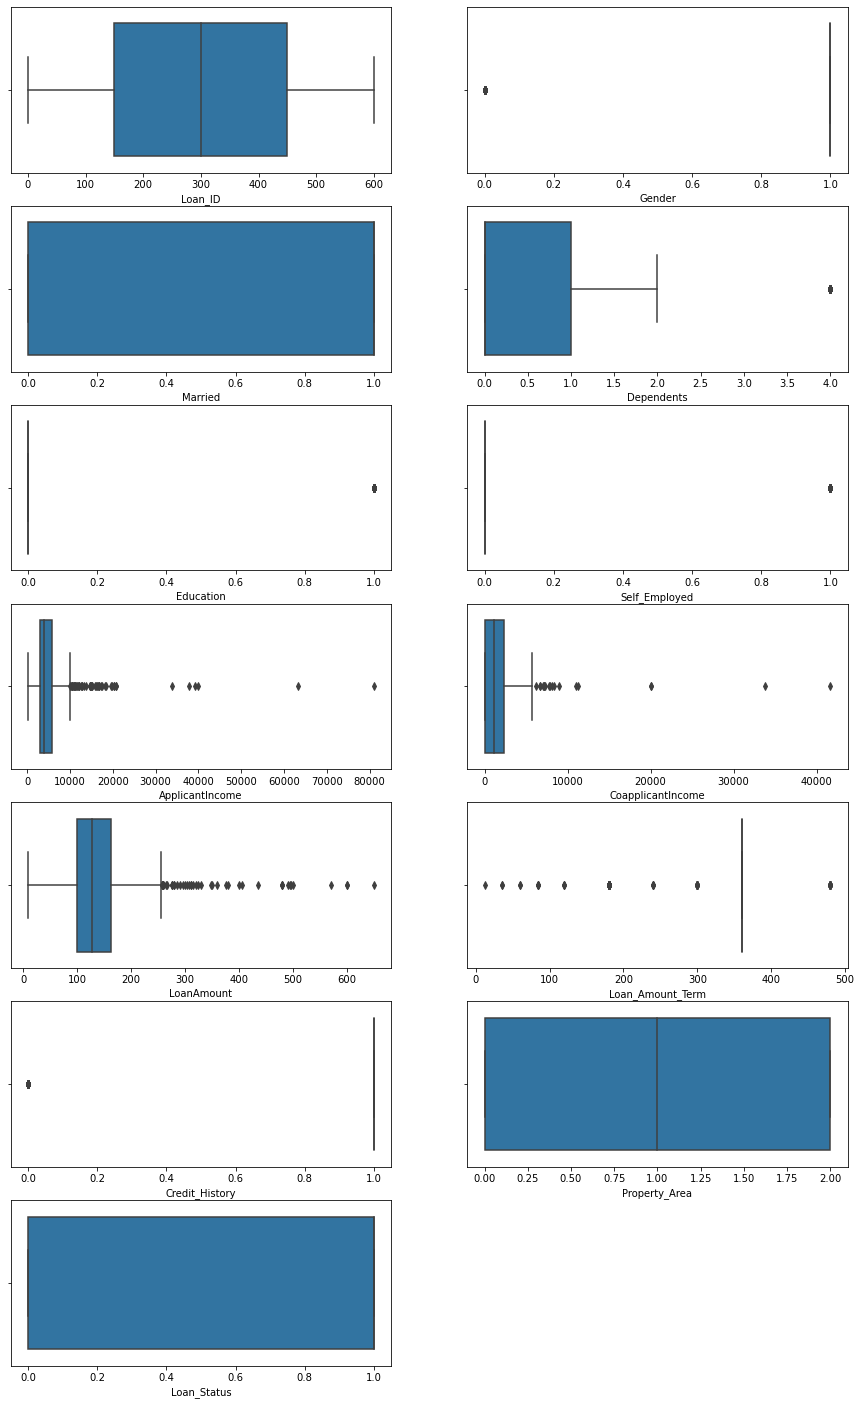

In [101]:
plt.figure(figsize=(15,25))
plotnumber = 1
for i in df:
    if plotnumber < 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.boxplot(df[i])
        plotnumber+=1
plt.show()

**`we have only three continues columns i.e ApplicantIncome, CoapplicantIncome and LoanAmount. And all these columns has Outliers`**

In [168]:
## Applying ZScore method.
from scipy.stats import zscore
z_score = zscore(df)
abs_z_score = np.abs(z_score)

In [169]:
filter = ((abs_z_score <3 ) & (abs_z_score >-3)).all(axis=1)

In [170]:
new_df = df[filter]

In [171]:
new_df.shape

(566, 13)

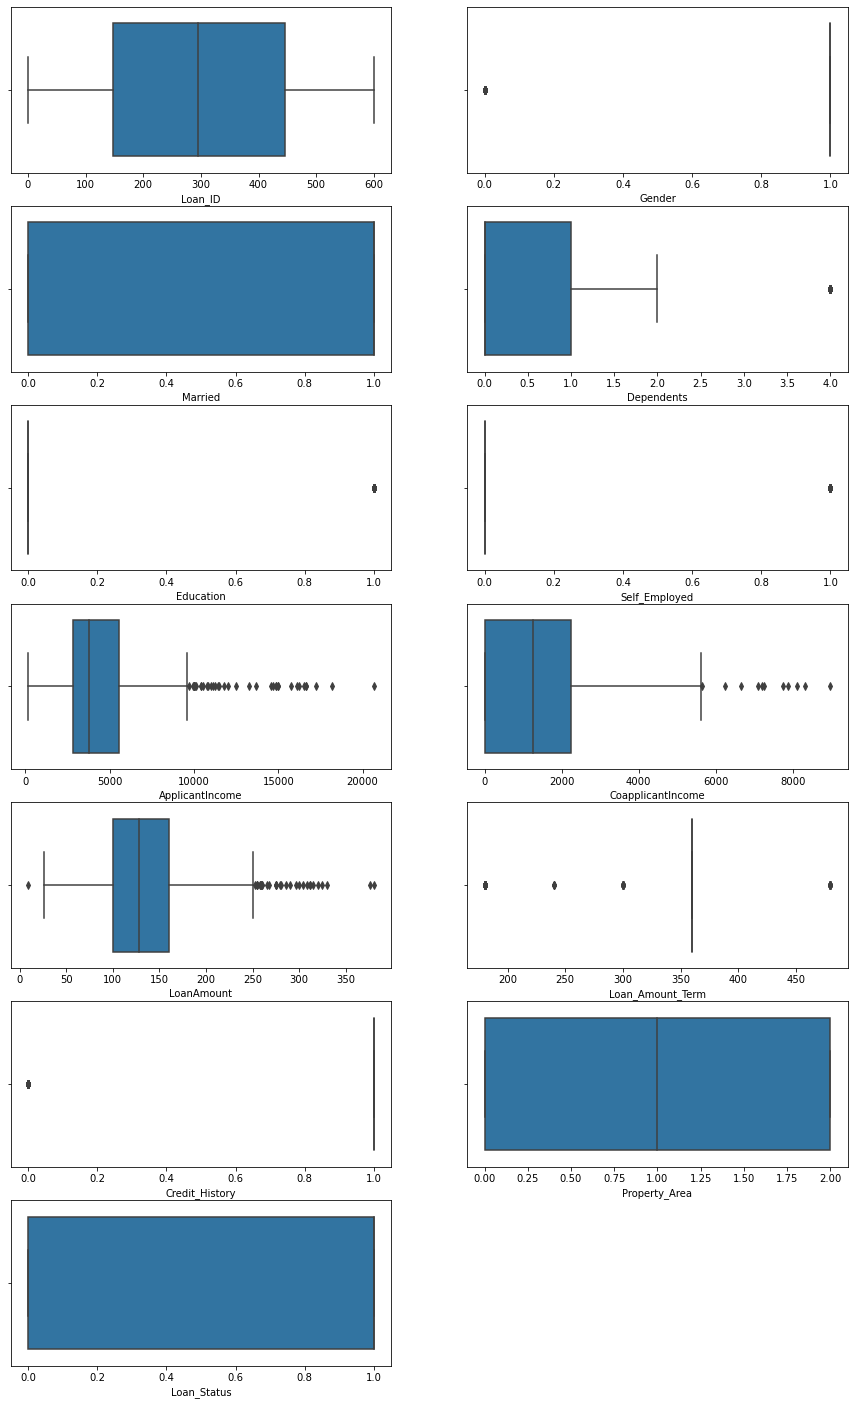

In [172]:
plt.figure(figsize=(15,25))
plotnumber = 1
for i in new_df:
    if plotnumber < 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.boxplot(new_df[i])
        plotnumber+=1
plt.show()

`It still has Outliers. But it is important for our model to understand practical data. Because it is possible to have Outliers in Applicant Income, Loan_Amount and CoapplicantIncome. Because there are people who earn more than others and apply for loan. May be bussiness expand or if person is salaried may be need of some personal reasons`

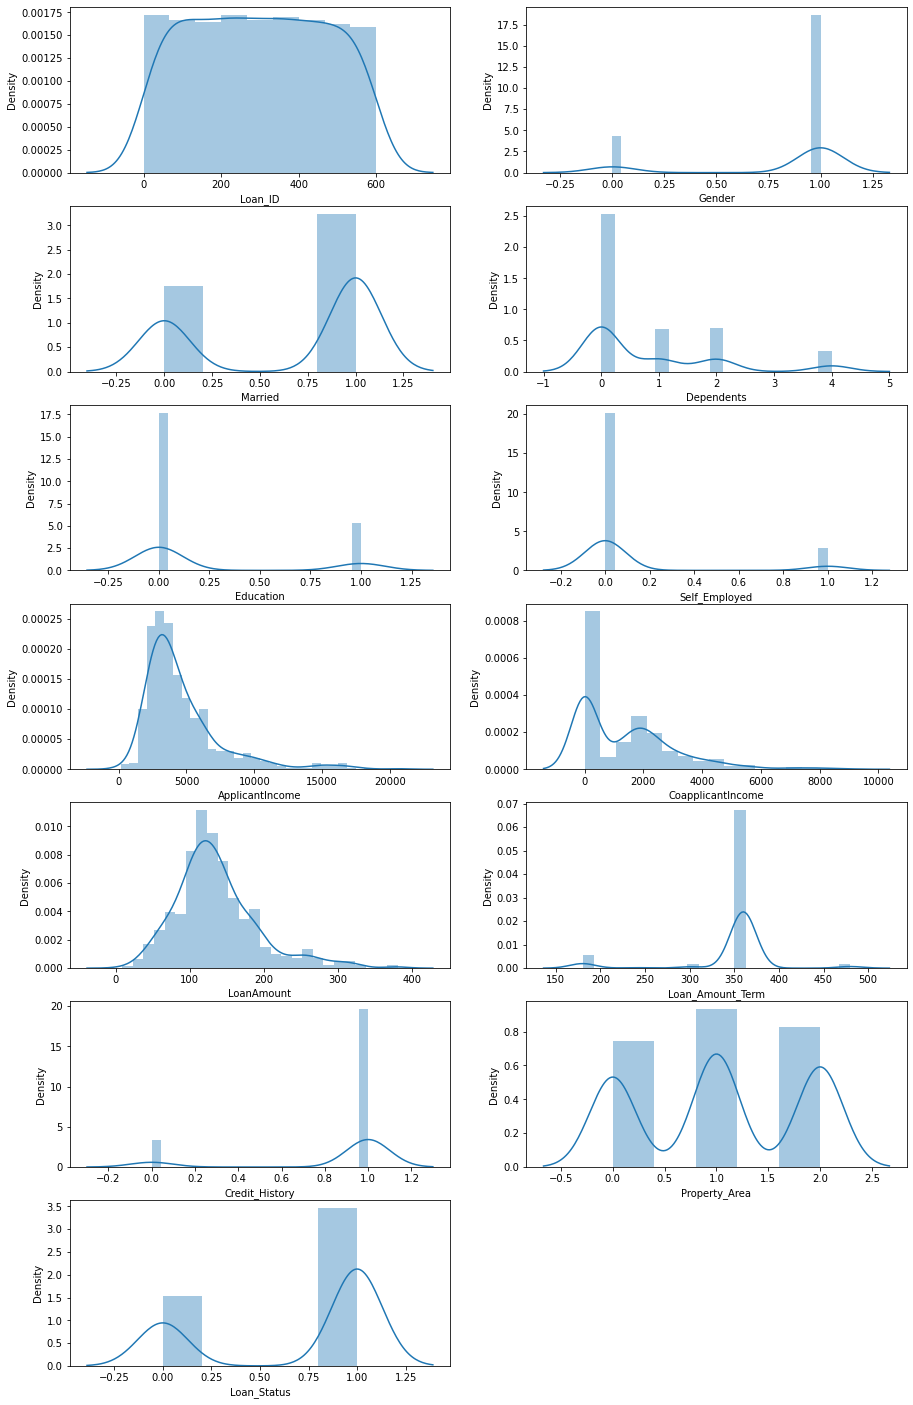

In [107]:
plt.figure(figsize=(15,25))
plotnumber = 1
for i in new_df:
    if plotnumber < 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.distplot(new_df[i])
        plotnumber+=1
plt.show()

In [108]:
df1 = pd.DataFrame(new_df)

In [109]:
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
iqr = q3-q1

In [110]:
for i in df1[["ApplicantIncome", "LoanAmount" ,"CoapplicantIncome"]]:
    max=(q3[i]+(1.5*iqr[i]))
    index=np.where(df1[i]>max)
    df1.drop(df1.index[index],inplace=True,axis=0)
df1.shape

(499, 13)

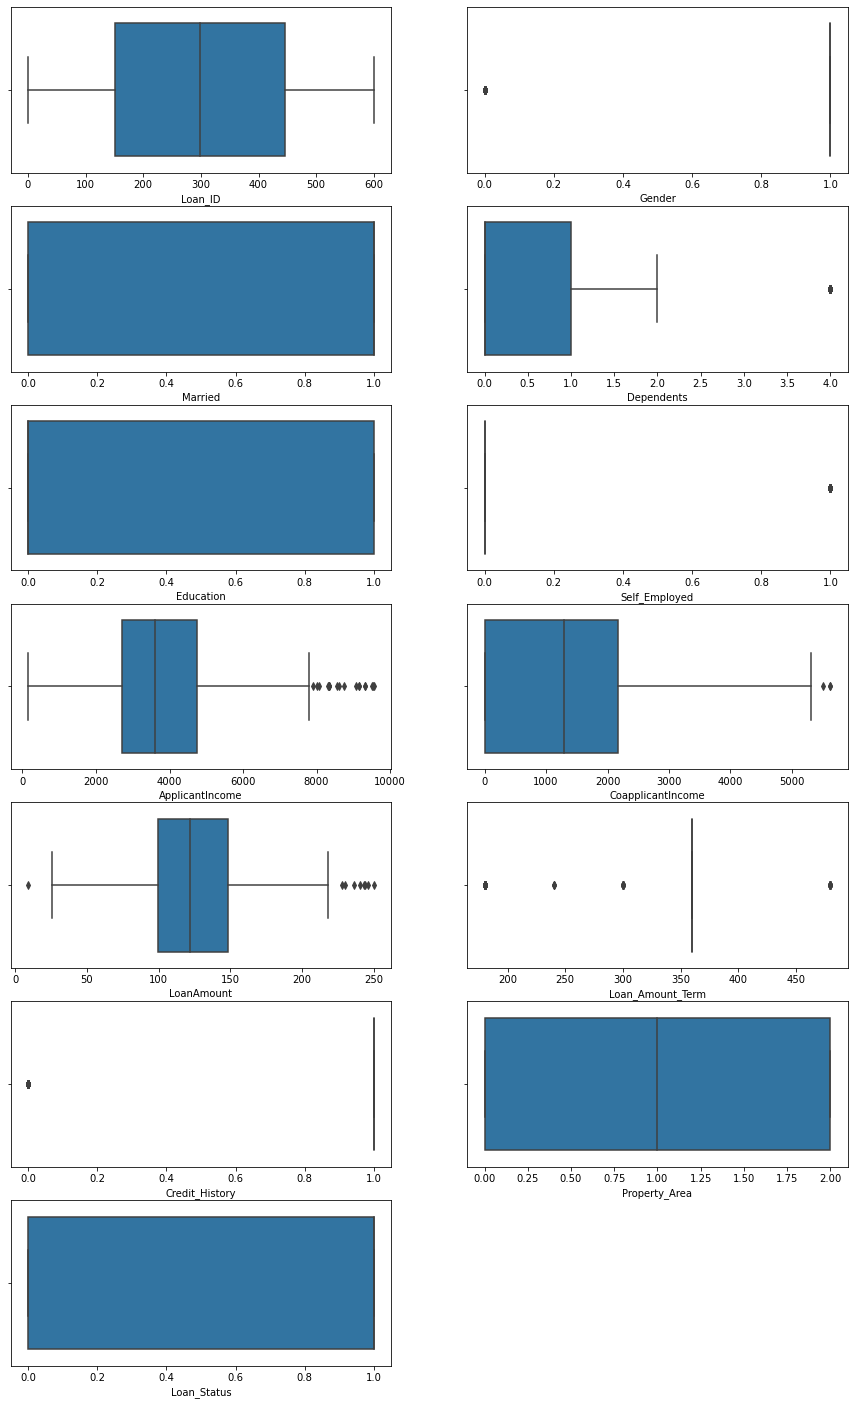

In [111]:
plt.figure(figsize=(15,25))
plotnumber = 1
for i in df1:
    if plotnumber < 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.boxplot(df1[i])
        plotnumber+=1
plt.show()

In [112]:
df1.skew()

Loan_ID             -0.005319
Gender              -1.598739
Married             -0.600043
Dependents           1.520410
Education            1.130580
Self_Employed        2.598665
ApplicantIncome      1.019323
CoapplicantIncome    0.755801
LoanAmount           0.251296
Loan_Amount_Term    -2.027093
Credit_History      -1.985205
Property_Area       -0.028366
Loan_Status         -0.882831
dtype: float64

Even after losing more than 10% of the data. This data still has skewness and Outliers. So I am going to use dataset __new_df1__ which i get after applying the zscore

__Dataset still has skewnes__

In [113]:
# Applying PowerTransformation to remove Skewness from the dataset(Only from contineous data i.e CoapplicantIncome,LoanAmount,ApplicantIncome)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [114]:
new_df[["CoapplicantIncome","LoanAmount","ApplicantIncome"]] = pt.fit_transform(new_df[["CoapplicantIncome","LoanAmount","ApplicantIncome"]])

In [173]:
new_df.skew()

Loan_ID              0.018166
Gender              -1.592567
Married             -0.623308
Dependents           1.501815
Education            1.288724
Self_Employed        2.317365
ApplicantIncome      2.161747
CoapplicantIncome    1.363872
LoanAmount           1.112732
Loan_Amount_Term    -2.084739
Credit_History      -2.003091
Property_Area       -0.059747
Loan_Status         -0.836936
dtype: float64

### The skewness of the dataset is in Tolerable limit

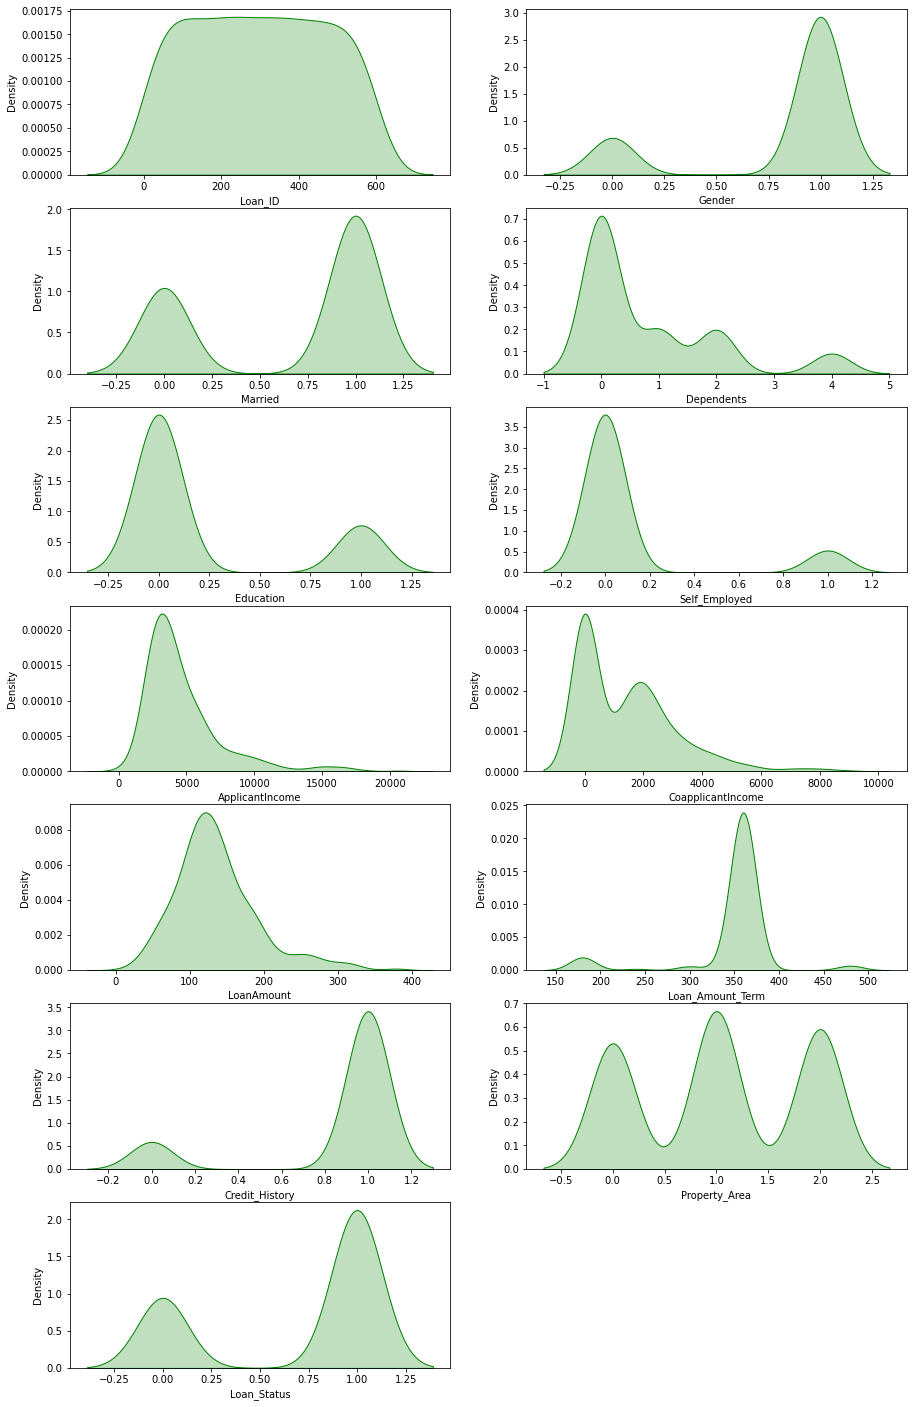

In [174]:
plt.figure(figsize=(15,25))
plotnumber = 1
for i in df1:
    if plotnumber < 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.kdeplot(new_df[i],fill=True,data=new_df,color='g')
        plotnumber+=1
plt.show()

Data seems to more Guassian Now

In [175]:
## Using smote to balances the Target columns
from sklearn.utils import resample
zero = new_df[new_df["Loan_Status"]==0]
one = new_df[new_df["Loan_Status"]==1]

In [176]:
up_sampled = resample(zero,replace=True,n_samples=len(one),random_state=0)

In [177]:
new_df=pd.concat([one,up_sampled])

<AxesSubplot:>

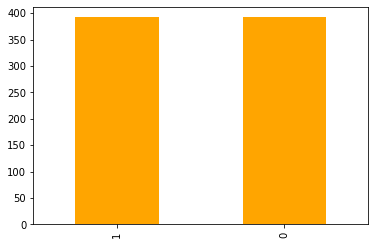

In [178]:
new_df["Loan_Status"].value_counts().plot.bar(color='Orange')

Dataset is seems to balanced now

In [179]:
x = new_df.drop(columns=["Loan_Status","Loan_ID"],axis=1)# As loan id here is just identity given to file or case no or similar like nominal data
y=new_df["Loan_Status"]

In [180]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [181]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [182]:
pca = PCA()
pca.fit_transform(x_scaled)

array([[-1.06281524,  0.77536949, -0.09682627, ..., -0.621309  ,
         0.90577115, -0.28124557],
       [-0.49543666,  0.19451515,  1.11582473, ..., -2.20602651,
        -0.69418234, -0.19871198],
       [ 0.1877485 , -1.54340429, -0.41805877, ..., -0.38009453,
        -0.74539223,  0.16565007],
       ...,
       [ 2.58702198, -1.00718562,  0.23646133, ...,  1.31505406,
         1.18657265,  0.17061764],
       [ 0.00913531, -0.2951995 ,  1.52705204, ..., -1.55027941,
        -0.9902203 ,  0.14507888],
       [-0.42701495, -1.7685777 ,  0.17478478, ..., -0.76065374,
        -0.97637614,  0.17523381]])

In [183]:
np.cumsum(pca.explained_variance_ratio_)

array([0.17665313, 0.32372267, 0.43847569, 0.53536375, 0.63095148,
       0.71161795, 0.78499117, 0.85645546, 0.92148408, 0.9721201 ,
       1.        ])

In [184]:
# On above varince i am selecting only 9 components
pca = PCA(n_components=9)
new_princi = pca.fit_transform(x_scaled)

In [185]:
new_prin = pd.DataFrame(new_princi)

In [186]:
max_accu = 0
max_RS = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(new_prin,y,test_size=0.30,random_state=i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    accu_score = accuracy_score(y_test,y_pred)
    if accu_score > max_accu:
        max_Rs = i
        max_accu = accu_score
print("Random state :",max_RS,"Best accuracy :",max_accu)

Random state : 0 Best accuracy : 0.7711864406779662


In [187]:
x_train,x_test,y_train,y_test = train_test_split(new_prin,y,test_size=0.30,random_state=50)

In [188]:
diff=[]
cross=[]
accu =[]

### GradientBoostingClassifier

In [203]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [204]:
y_pred = gbc.predict(x_test)

In [205]:
a = accuracy_score(y_test,y_pred)
c = cross_val_score(gbc,new_prin,y,cv=3).mean()

In [206]:
print(" Accuracy score :",a,"\n","="*80,"\n Cross_validation_Score :",c,"\n","="*80,"\n Classification report :\n",classification_report(y_test,y_pred),
     "="*80,"\n Confusion matrix :\n",confusion_matrix(y_test,y_pred))

 Accuracy score : 0.8728813559322034 
 Cross_validation_Score : 0.8329092451229857 
 Classification report :
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       117
           1       0.89      0.85      0.87       119

    accuracy                           0.87       236
   macro avg       0.87      0.87      0.87       236
weighted avg       0.87      0.87      0.87       236
 Confusion matrix :
 [[105  12]
 [ 18 101]]


In [207]:
cross.append(c)
accu.append(a)
diff.append(a-c)

## BaggingClassifier

In [136]:
bag_clf = BaggingClassifier()
bag_clf.fit(x_train,y_train)

BaggingClassifier()

In [137]:
y_pred = bag_clf.predict(x_test)

In [138]:
a = accuracy_score(y_test,y_pred)
c = cross_val_score(bag_clf,new_prin,y,cv=3).mean()

In [139]:
print(" Accuracy score :",a,"\n","="*80,"\n Cross_validation_Score :",c,"\n","="*80,"\n Classification report :\n",classification_report(y_test,y_pred),
     "="*80,"\n Confusion matrix :\n",confusion_matrix(y_test,y_pred))

 Accuracy score : 0.847457627118644 
 Cross_validation_Score : 0.838003178224289 
 Classification report :
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       117
           1       0.89      0.80      0.84       119

    accuracy                           0.85       236
   macro avg       0.85      0.85      0.85       236
weighted avg       0.85      0.85      0.85       236
 Confusion matrix :
 [[105  12]
 [ 24  95]]


In [140]:
cross.append(c)
accu.append(a)
diff.append(a-c)

### RandomForestClassifier

In [145]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [146]:
y_pred = rf.predict(x_test)

In [147]:
a = accuracy_score(y_test,y_pred)
c = cross_val_score(rf,new_prin,y,cv=3).mean()

In [148]:
print(" Accuracy score :",a,"\n","="*80,"\n Cross_validation_Score :",c,"\n","="*80,"\n Classification report :\n",classification_report(y_test,y_pred),
     "="*80,"\n Confusion matrix :\n",confusion_matrix(y_test,y_pred))

 Accuracy score : 0.8940677966101694 
 Cross_validation_Score : 0.8584227818236768 
 Classification report :
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       117
           1       0.94      0.85      0.89       119

    accuracy                           0.89       236
   macro avg       0.90      0.89      0.89       236
weighted avg       0.90      0.89      0.89       236
 Confusion matrix :
 [[110   7]
 [ 18 101]]


In [149]:
cross.append(c)
accu.append(a)
diff.append(a-c)

### DecisionTreeClassifier

In [150]:
dt = DecisionTreeClassifier()

In [151]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [152]:
y_pred = dt.predict(x_test)

In [153]:
a = accuracy_score(y_test,y_pred)
c = cross_val_score(dt,new_prin,y,cv=3).mean()

In [154]:
print(" Accuracy score :",a,"\n","="*80,"\n Cross_validation_Score :",c,"\n","="*80,"\n Classification report :\n",classification_report(y_test,y_pred),
     "="*80,"\n Confusion matrix :\n",confusion_matrix(y_test,y_pred))

 Accuracy score : 0.8389830508474576 
 Cross_validation_Score : 0.7933715500180359 
 Classification report :
               precision    recall  f1-score   support

           0       0.78      0.94      0.85       117
           1       0.93      0.74      0.82       119

    accuracy                           0.84       236
   macro avg       0.85      0.84      0.84       236
weighted avg       0.85      0.84      0.84       236
 Confusion matrix :
 [[110   7]
 [ 31  88]]


In [155]:
cross.append(c)
accu.append(a)
diff.append(a-c)

### KNeighborsClassifier

In [156]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [157]:
y_pred = knn.predict(x_test)

In [158]:
a = accuracy_score(y_test,y_pred)
c = cross_val_score(knn,new_prin,y,cv=3).mean()

In [159]:
print(" Accuracy score :",a,"\n","="*80,"\n Cross_validation_Score :",c,"\n","="*80,"\n Classification report :\n",classification_report(y_test,y_pred),
     "="*80,"\n Confusion matrix :\n",confusion_matrix(y_test,y_pred))

 Accuracy score : 0.8177966101694916 
 Cross_validation_Score : 0.7359782788843067 
 Classification report :
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       117
           1       0.83      0.80      0.82       119

    accuracy                           0.82       236
   macro avg       0.82      0.82      0.82       236
weighted avg       0.82      0.82      0.82       236
 Confusion matrix :
 [[98 19]
 [24 95]]


In [160]:
cross.append(c)
accu.append(a)
diff.append(a-c)

### VotingClassifier

In [161]:
vot_clf = VotingClassifier(estimators=[ ('rf', rf), ('gb', gbc),("dt",dt)], voting='hard')
vot_clf.fit(x_train,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier()),
                             ('dt', DecisionTreeClassifier())])

In [162]:
y_pred = vot_clf.predict(x_test)

In [163]:
a = accuracy_score(y_test,y_pred)
c = cross_val_score(vot_clf,new_prin,y,cv=3).mean()

In [164]:
print(" Accuracy score :",a,"\n","="*80,"\n Cross_validation_Score :",c,"\n","="*80,"\n Classification report :\n",classification_report(y_test,y_pred),
     "="*80,"\n Confusion matrix :\n",confusion_matrix(y_test,y_pred))

 Accuracy score : 0.8983050847457628 
 Cross_validation_Score : 0.8520468349370692 
 Classification report :
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       117
           1       0.94      0.86      0.89       119

    accuracy                           0.90       236
   macro avg       0.90      0.90      0.90       236
weighted avg       0.90      0.90      0.90       236
 Confusion matrix :
 [[110   7]
 [ 17 102]]


In [165]:
cross.append(c)
accu.append(a)
diff.append(a-c)

#### Printing all model Accuracies

In [166]:
model = ["GradientBooting","BaggingClassifier","RandomForest","DecisionTree","KNeighbors","votingclassifier"]

In [167]:
best = pd.DataFrame({"Models":model,
                    "Accuracy SCore":accu,
                    "Cross_validation Score":cross,
                    "Difference":diff})

best

,Models,Accuracy SCore,Cross_validation Score,Difference
0,GradientBooting,0.881356,0.830345,0.051011
1,BaggingClassifier,0.847458,0.838003,0.009454
2,RandomForest,0.894068,0.858423,0.035645
3,DecisionTree,0.838983,0.793372,0.045612
4,KNeighbors,0.817797,0.735978,0.081818
5,votingclassifier,0.898305,0.852047,0.046258


#### BaggingClassifier Is my best model

## HyperparameterTunning

In [732]:
param = {"n_estimators":[10,50,100,500,600,900],
        "max_features":range(2,10,1),
        "bootstrap":[True,False],
        "random_state":[0,50,100,75,25,264,300]}

In [733]:
rand_search = RandomizedSearchCV(bag_clf,param_distributions=param,cv=3)

In [734]:
rand_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=BaggingClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': range(2, 10),
                                        'n_estimators': [10, 50, 100, 500, 600,
                                                         900],
                                        'random_state': [0, 50, 100, 75, 25,
                                                         264, 300]})

In [735]:
rand_search.best_params_

{'random_state': 300,
 'n_estimators': 500,
 'max_features': 4,
 'bootstrap': False}

In [736]:
bag_clf = BaggingClassifier(random_state=300,n_estimators=500,max_features=4,bootstrap=False)

In [742]:
bag_clf.fit(x_train,y_train)

BaggingClassifier(bootstrap=False, max_features=4, n_estimators=500,
                  random_state=300)

In [743]:
y_pred = bag_clf.predict(x_test)

In [744]:
accuracy_score(y_test,y_pred)

0.8786610878661087

In [746]:
cross_val_score(bag_clf,new_prin,y,cv=3).mean()

0.852976781576583

In [747]:
confusion_matrix(y_test,y_pred)

array([[108,  11],
       [ 18, 102]], dtype=int64)

In [750]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

#GradientBoostingClassifier
print("GradientBoostingClassifier roc_auc_score :",roc_auc_score(y_test,gbc.predict(x_test)))


#BaggingClassifier
print("BaggingClassifier roc_auc_score :",roc_auc_score(y_test,bag_clf.predict(x_test)))

#RandomForest
print("RandomForest roc_auc_score :",roc_auc_score(y_test,rf.predict(x_test)))


#DecisionTree
print("DecisionTree roc_auc_score :",roc_auc_score(y_test,dt.predict(x_test)))

#KNeighbors
print("KNeighborsClassifier roc_auc_score :",roc_auc_score(y_test,knn.predict(x_test)))

#VotingClassifier
print("VotingClassifier roc_auc_score :",roc_auc_score(y_test,vot_clf.predict(x_test)))

GradientBoostingClassifier roc_auc_score : 0.828501400560224
BaggingClassifier roc_auc_score : 0.878781512605042
RandomForest roc_auc_score : 0.8955182072829132
DecisionTree roc_auc_score : 0.8287114845938374
KNeighborsClassifier roc_auc_score : 0.7572478991596638
VotingClassifier roc_auc_score : 0.8663515406162465


In [787]:
#keeping out voting classifier as the roc and auc is cannot be used with voting normally

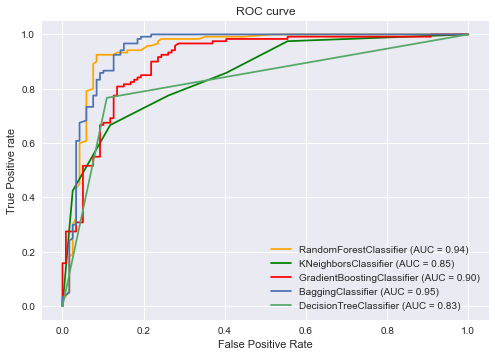

In [788]:
plt.style.use('seaborn')

disp = plot_roc_curve(rf,x_test,y_test,color='orange')
plot_roc_curve(knn,x_test,y_test,color='green',ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,color='red',ax=disp.ax_)
plot_roc_curve(bag_clf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Saving Model:

In [790]:
import pickle

In [791]:
pickle.dump(bag_clf,open("Loan_prediction.pk1","wb"))

In [793]:
load_model = pickle.load(open("Loan_prediction.pk1","rb"))